<a href="https://colab.research.google.com/github/quoctrungsz27/week7_AI/blob/main/50_Startups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

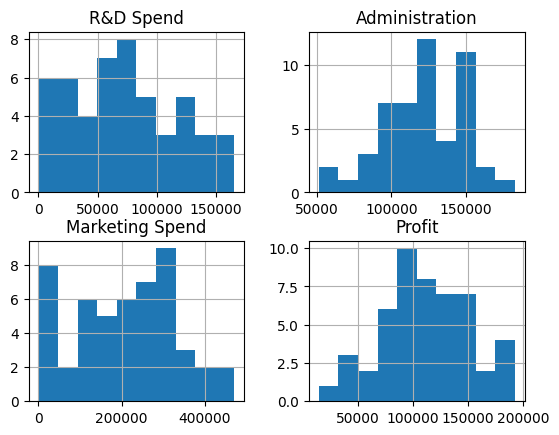

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Doc file CSV
url = '/content/drive/MyDrive/Colab Notebooks/50_Startups.csv'
data = pd.read_csv(url)

# Hien thi bieu do Histogram
data.hist()
plt.show()

                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


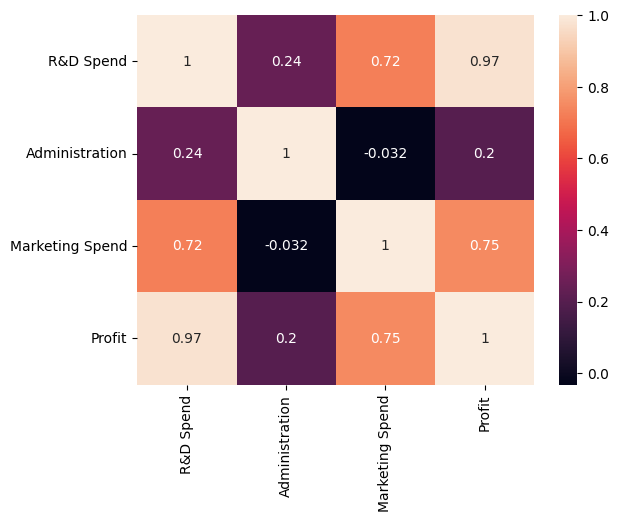

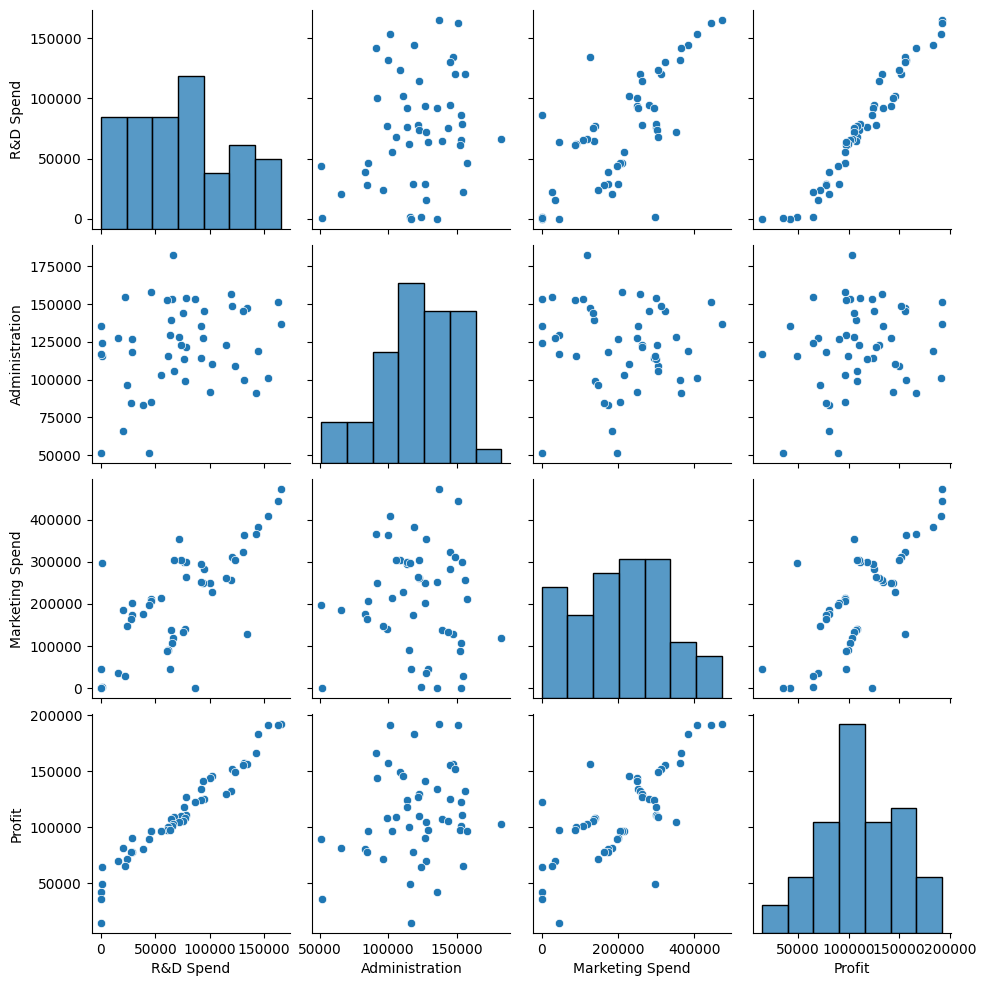

In [3]:
import seaborn as sns
# Tuong quan
correlation = data.corr()
print(correlation)

# Bang phan phoi va tuong quan dung thu vien seaborn
sns.heatmap(correlation,annot = True)
sns.pairplot(data)

#R&D Spend anh huong nhieu nhat toi Profit (0.97)  ( bac 2 tro len)

In [4]:

from sklearn import linear_model 
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['R&D Spend']),y = data['Profit'])

print(model.intercept_)  # Intercept cua mo hinh
print(model.coef_) # Coffient cua mo hinh
print(model.score(X=pd.DataFrame(data['R&D Spend']),y = data['Profit'])) # Do chinh xac cua mo hinh
# y = coef*x + intercept

49032.89914125215
[0.85429137]
0.9465353160804393


In [5]:
import numpy as np

# Mo hinh hoi quy tuyen tinh
model = linear_model.LinearRegression()
X=pd.DataFrame([data['R&D Spend'],data['R&D Spend']**2,data['R&D Spend']**3]).T
model.fit(X,y = data['Profit'])

print('Intercept cua mo hinh:',model.intercept_)
print('Coffient cua mo hinh:',model.coef_)
print('Do chinh xac cua mo hinh:', model.score(X,y= data['Profit']))

Intercept cua mo hinh: 43108.76756818297
Coffient cua mo hinh: [ 1.40072682e+00 -8.82403324e-06  3.64774030e-11]
Do chinh xac cua mo hinh: 0.9540709421464032


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


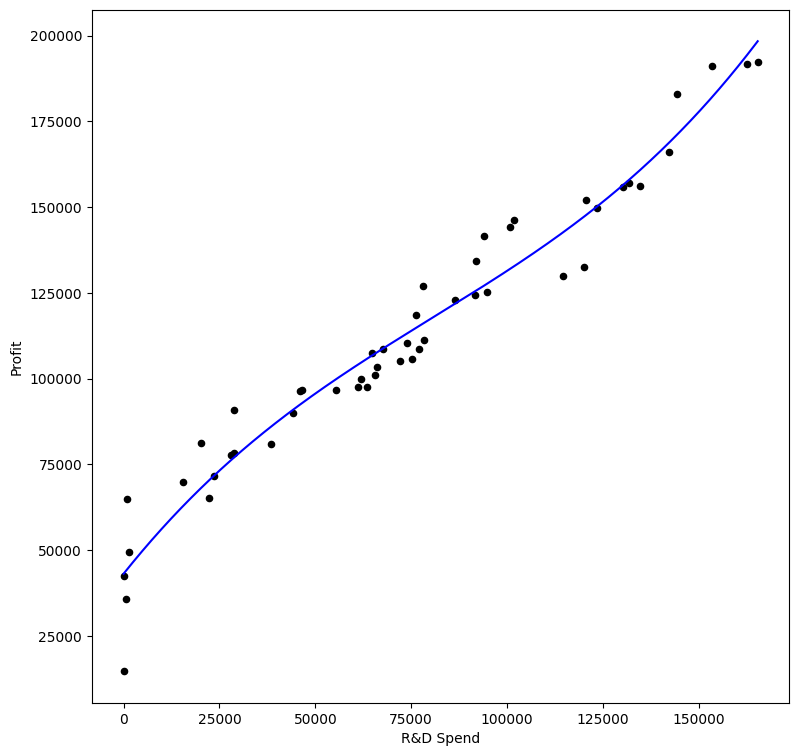

In [6]:
range = np.arange(0,165349.2,0.1)
data.plot(kind = 'scatter',x='R&D Spend',y='Profit',figsize=(9,9),color ='black')
predictor = pd.DataFrame([range ,range**2,range**3]).T
y_pred = model.predict(X = predictor)
plt.plot(range,y_pred,color = 'blue') 
